In [1]:
from shared.preface import *
import shared.functions as fct

# Initialize parameters and files.
PRE = PRE(
    # sim='L006N188', 
    sim='L012N376', 
    z0_snap=62, z4_snap=13, DM_lim=1000000,
    sim_dir=SIM_ROOT, sim_ver=SIM_TYPE,
    phis=20, thetas=20, vels=400,
    pre_CPUs=6, sim_CPUs=16
)

mass_gauge = 12.3
mass_range = 0.3
size = 1
hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
fct.halo_batch_indices(
    PRE.Z0_STR, mass_gauge, mass_range, 'halos', size, 
    hname, PRE.SIM_DIR, PRE.OUT_DIR
)
halo_batch_IDs = np.load(f'{PRE.OUT_DIR}/halo_batch_{hname}_indices.npy')
halo_batch_params = np.load(f'{PRE.OUT_DIR}/halo_batch_{hname}_params.npy')
halo_num = len(halo_batch_params)

print('********Number density band********')
print('Halo batch params (Rvir,Mvir,cNFW):')
print(halo_batch_params)
print('***********************************')


mass_ticks = 100
mass_range_eV = np.geomspace(0.01, 0.3, mass_ticks)*eV  # 10 to 300 meV

n_nus_l = []
for halo_j in range(halo_num):
# for halo_j in (0,2):
    
# halo_j = 0
# halo_num = 1

    # Load velocities.
    tot_name = f'{hname}_halo{halo_j}'
    fname = f'{PRE.NUS}nus_{tot_name}'
    u_all = fct.load_sim_data(PRE.OUT_DIR, fname, 'velocities')

    # Calculate number density.
    out_file = f'{PRE.OUT_DIR}/number_densities_{PRE.NUS}nus_{tot_name}.npy'
    
    # "Normal" method.
    fct.number_density_1_mass(
        u_all, mass_range_eV, out_file, 
        average=False, m_average=0.01, z_average=3.5
    )

    nrd = np.load(f'{out_file}')#/N0

    n_nus_l.append(nrd)


n_nus_arr = np.array(n_nus_l).reshape(halo_num, mass_ticks)[0]
np.save(f'{os.getcwd()}/shared/N0_vals_{PRE.NUS}nus.npy', n_nus_arr)

********************* Initialization *********************
# Initial conditions for neutrinos:
PHIs = 20, THETAs=20, Vs=400
Total neutrinos: 160000
# Simulation parameters:
Simulation box: L012N376
Snapshot from 0062 (z=0) to 0013 (z=4)
Pre/Sim CPUs 6/16
DM limit for cells: 1000000
# File management:
Box files directory: 
 /home/fabian/ownCloud/snellius/L012N376/CDM_TF50
Output directory: 
 /home/fabian/my_github_projects/neutrino_clustering_V2/L012N376/CDM_TF50_noHalo
**********************************************************
********Number density band********
Halo batch params (Rvir,Mvir,cNFW):
[[299.54209457  12.45775108   8.69090077]]
***********************************


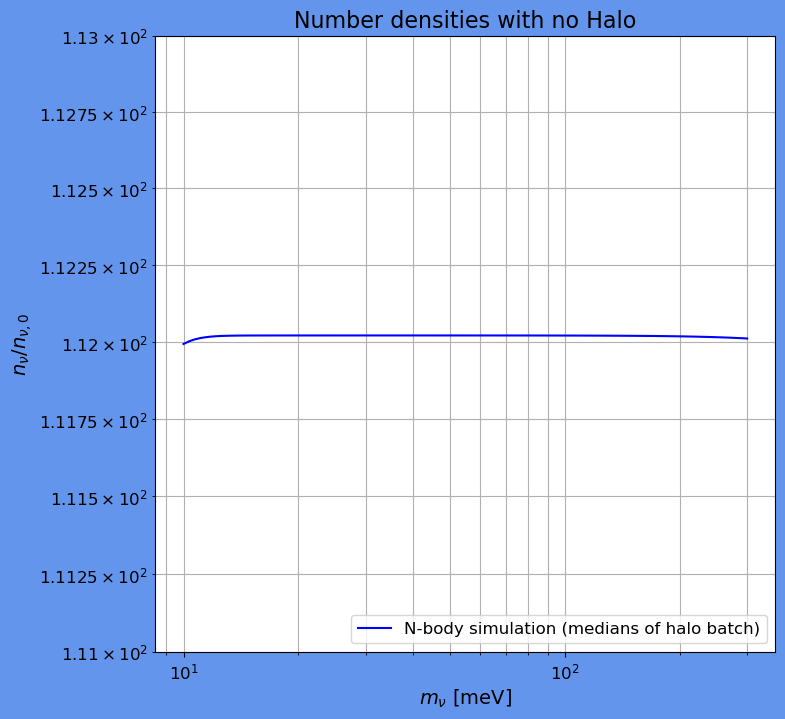

[111.99396424 112.00288503 112.00912154 112.01341337 112.01631967
 112.01825568 112.01952412 112.0203416  112.02086009 112.02118411
 112.02138412 112.02150657 112.02158147 112.02162775 112.02165711
 112.0216766  112.02169036 112.02170078 112.02170921 112.0217164
 112.02172273 112.02172844 112.02173364 112.02173841 112.02174277
 112.02174676 112.02175039 112.02175369 112.02175667 112.02175933
 112.02176168 112.02176374 112.0217655  112.02176697 112.02176814
 112.02176902 112.0217696  112.02176987 112.02176984 112.02176947
 112.02176877 112.02176771 112.02176628 112.02176445 112.02176219
 112.02175947 112.02175627 112.02175253 112.02174821 112.02174326
 112.02173763 112.02173125 112.02172404 112.02171594 112.02170684
 112.02169665 112.02168526 112.02167254 112.02165837 112.02164258
 112.021625   112.02160546 112.02158374 112.02155961 112.02153282
 112.02150309 112.02147009 112.02143348 112.02139288 112.02134785
 112.02129794 112.0212426  112.02118126 112.02111328 112.02103794
 112.020954

In [7]:
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('cornflowerblue')

# Plotting the number density median and percentiles, to create a "band".
ax.plot(
    mass_range_eV*1e3, (n_nus_arr), color='blue', 
    label='N-body simulation (medians of halo batch)'
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Number densities with no Halo')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
ax.set_ylim(111, 113)
plt.grid(True, which="both", ls="-")
plt.legend(loc='lower right')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(
    f'figures/{SIM_TYPE}_noHALO_eta_band_{PRE.NUS}nus_{hname}_batch.pdf',
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
    )
plt.show()
print(n_nus_arr, )

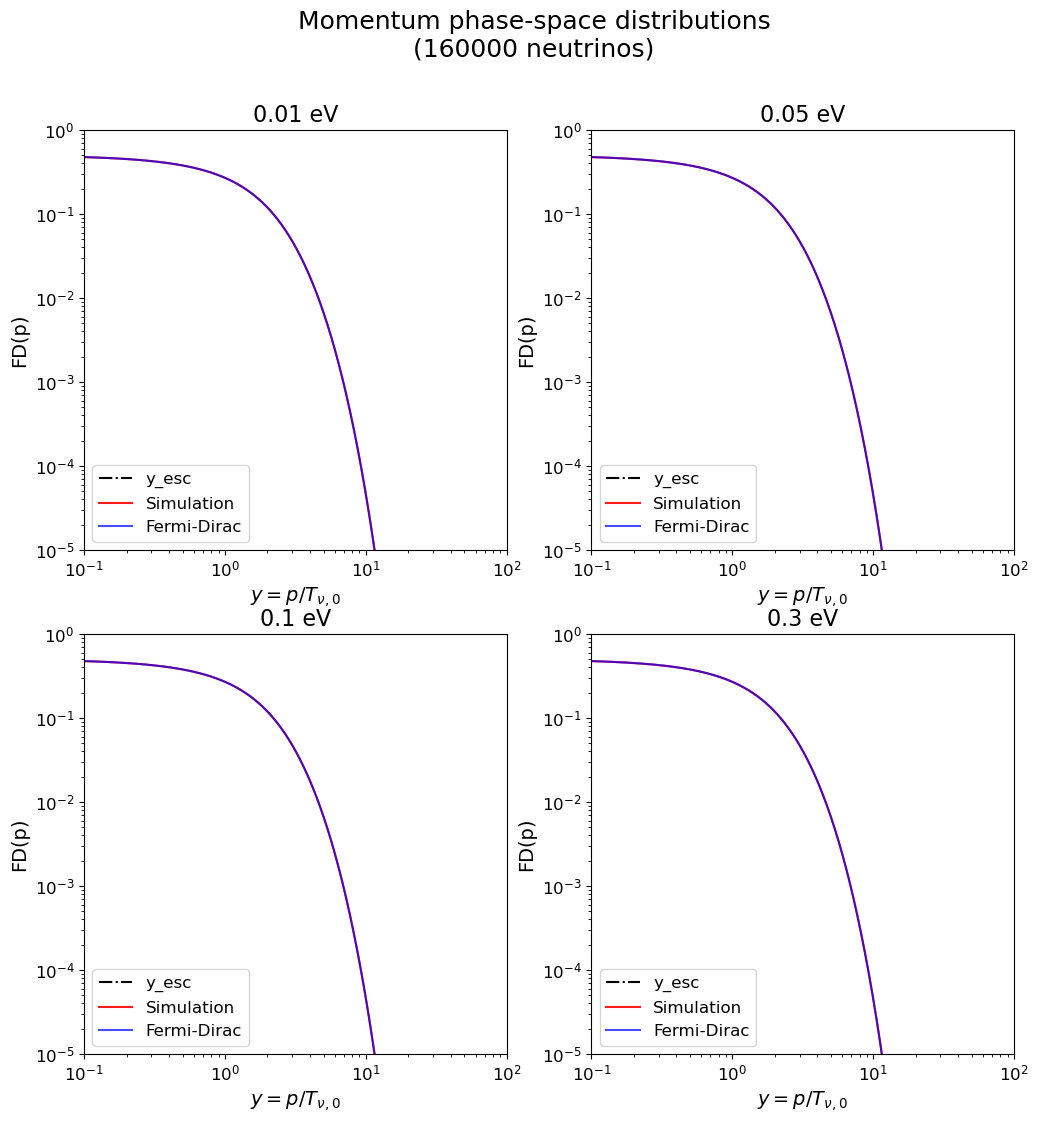

In [3]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.suptitle(
    'Momentum phase-space distributions' 
    '\n'
    f'({PRE.NUS} neutrinos)',
    fontsize=18)

Test_masses = np.array([0.02,0.021,0.022,0.023])*eV
# u_all = u_all_MW

for j, m_eV in enumerate(NU_MASSES):

    k = j

    # Convert to momenta.
    p, y = fct.u_to_p_eV(u_all, m_eV)
    p0, p1, y0, y1 = p[:,0], p[:,-1], y[:,0], y[:,-1]

    # Sort.
    order = p0.argsort()
    p0_sort, p1_sort = p0[order], p1[order]
    y0_sort, y1_sort = y0[order], y1[order]

    curtain_behaviour = False

    if curtain_behaviour:
        p1_final = p1_sort
        y0_final = y0_sort
    else:
        # Each velocity has a batch of neutrinos!
        # Take min. of each to represent most clustered ones.
        p1_blocks = p1_sort.reshape((PRE.Vs, PRE.PHIs*PRE.THETAs))
        p1_final = np.min(p1_blocks, axis=1)
        y0_blocks = y0_sort.reshape((PRE.Vs, PRE.PHIs*PRE.THETAs))
        y0_final = y0_blocks[:,0]

    # Fermi Dirac of the smoothed final momenta.
    # FDvals = fct.Fermi_Dirac(p1_smooth)
    FDvals = fct.Fermi_Dirac(p1_final)

    i = 0
    if j in (2,3):
        i = 1
        j -= 2
    
    # Escape momentum.
    Rvir_halo = halo_batch_params[0,0]*kpc
    Mvir_halo = 10**(halo_batch_params[0,1])*Msun
    cNFW_halo = halo_batch_params[0,2]
    rho0_halo = fct.scale_density_NFW(0., cNFW_halo)*(Msun/kpc**3)
    rs_halo = Rvir_halo/cNFW_halo
    p_esc_eV, y_esc = fct.escape_momentum(
        X_SUN, 0., rho0_halo, Mvir_halo, Rvir_halo, rs_halo, m_eV
    )
    axs[i,j].axvline(y_esc, c='k', ls='-.', label='y_esc')

    # Original Fermi-Dirac distr.
    pOG = np.geomspace(PRE.LOWER, PRE.UPPER, len(FDvals))
    FDvalsOG = fct.Fermi_Dirac(pOG)
    yOG = pOG/T_CNB

    axs[i,j].loglog(y0_final, FDvals, label='Simulation', c='red', alpha=0.9)
    axs[i,j].loglog(yOG, FDvalsOG, label='Fermi-Dirac', c='blue', alpha=0.7)
    axs[i,j].set_title(f'{m_eV} eV')
    axs[i,j].set_ylabel('FD(p)')
    axs[i,j].set_xlabel(r'$y = p / T_{\nu,0}$')
    axs[i,j].legend(loc='lower left')
    axs[i,j].set_ylim(1e-5, 1e0)
    # axs[i,j].set_xlim(PRE.LOWER/T_CNB, PRE.UPPER/T_CNB)
    axs[i,j].set_xlim(PRE.LOWER/T_CNB, 1e2)


plt.savefig(f'figures/Fermi_Dirac_noHALO_{PRE.NUS}neutrinos.pdf')
plt.show()

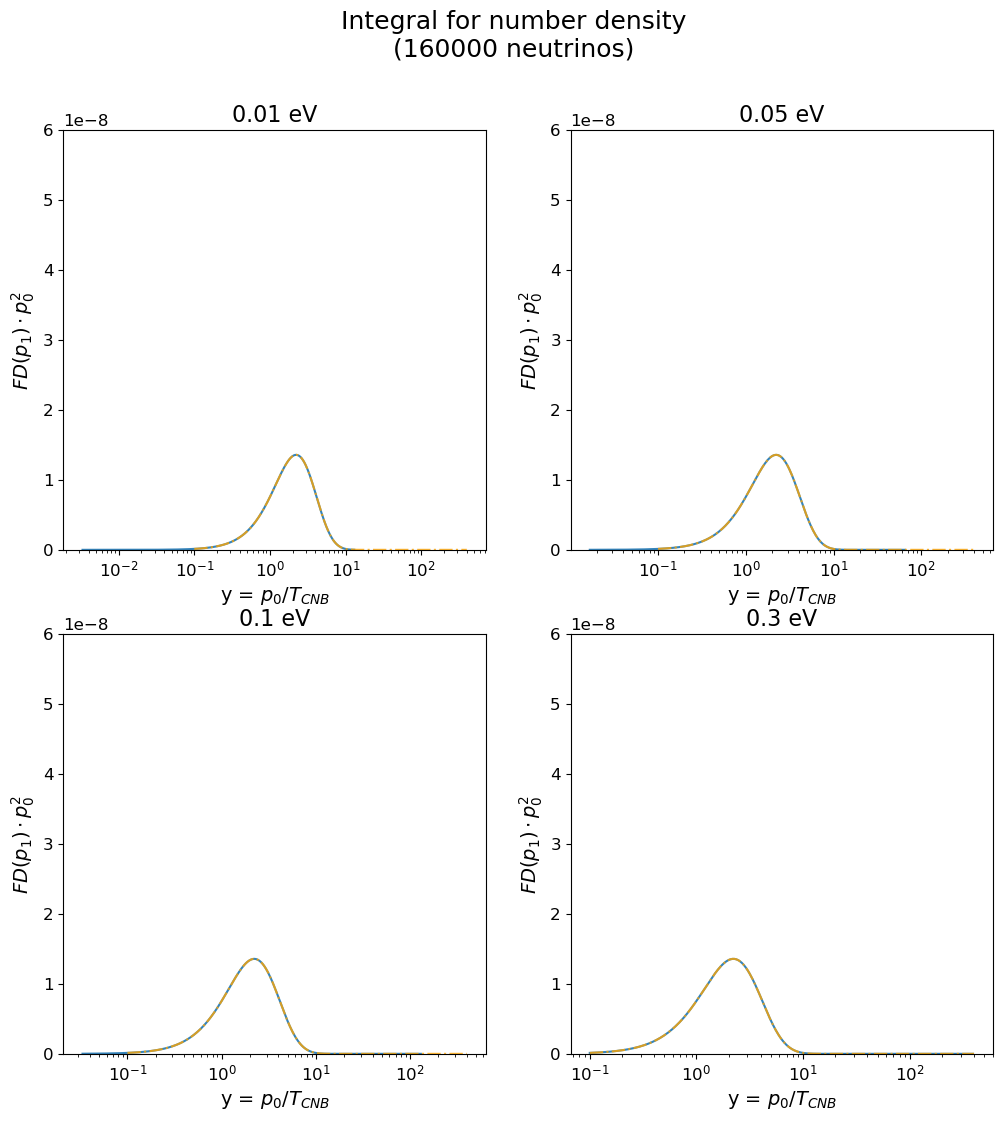

In [4]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.suptitle(
    'Integral for number density' 
    '\n'
    f'({PRE.NUS} neutrinos)',
    fontsize=18)

Test_masses = np.array([0.01,0.015,0.02,0.025])*eV

for j, m_eV in enumerate(NU_MASSES):

    k = j

    # Convert to first and last momenta (of each neutrino).
    p0, _ = fct.u_to_p_eV(u_all[:,0], m_eV)
    p1, _ = fct.u_to_p_eV(u_all[:,-1], m_eV)

    # Sort momenta.
    ind = p0.argsort()
    p0_sort, p1_sort = p0[ind], p1[ind]

    curtain_behaviour = True

    if curtain_behaviour:
        p1_final = p1_sort
        p0_final = p0_sort
    else:
        # Each velocity has a batch of neutrinos!
        # Take min. of each to represent most clustered ones.
        p1_blocks = p1_sort.reshape((PRE.Vs, PRE.PHIs*PRE.THETAs))
        p1_final = np.min(p1_blocks, axis=1)
        p0_blocks = p0_sort.reshape((PRE.Vs, PRE.PHIs*PRE.THETAs))
        p0_final = p0_blocks[:,0]


    # Fermi-Dirac value with momentum at end of sim.
    FDvals = fct.Fermi_Dirac(p1_final)

    # What number density function integrates.
    y = FDvals * p0_final**2 
    x = p0_final

    i = 0
    if j in (2,3):
        i = 1
        j -= 2


    # Using all velocities of sim.
    axs[i,j].set_title(f'{m_eV} eV')
    axs[i,j].semilogx(x/T_CNB, y, alpha=0.9)

    # Original Fermi-Dirac distr.
    y_FD = fct.Fermi_Dirac(PRE.MOMENTA) * PRE.MOMENTA**2
    x_FD = PRE.MOMENTA/T_CNB
    axs[i,j].semilogx(x_FD, y_FD, c='orange', alpha=0.8, ls='-.')

    # Plot settings.
    axs[i,j].set_xlabel(r'y = $p_0/T_{CNB}$')
    axs[i,j].set_ylabel(r'$FD(p_1) \cdot p_0^2$')
    axs[i,j].set_ylim(0, 6*1e-8)

plt.show()

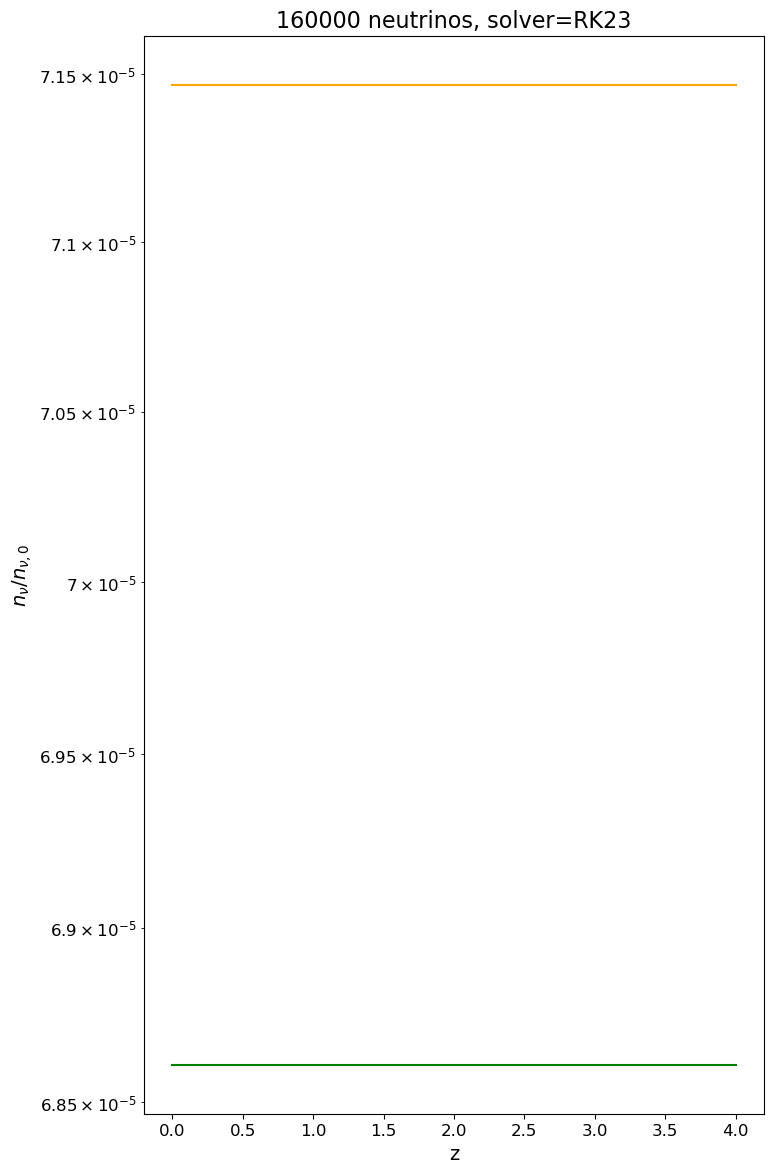

In [6]:
def n_nu_of_redshift(m_eV):
    
    # Convert to momenta. 
    p, _ = fct.u_to_p_eV(u_all, m_eV)

    n_nus = np.zeros(len(ZEDS))
    for i, _ in enumerate(ZEDS):

        # Calculate number density.
        n_nus[i] = fct.number_density(p[:,0], p[:,i])

    np.save(f'{out_file}', n_nus)

out_file = f'{PRE.OUT_DIR}/z_dependence_{PRE.NUS}nus_{tot_name}.npy'

# Plotting.
fig, ax = plt.subplots(1,1, figsize=(8,14))

colors = ['blue', 'orange', 'green', 'red']

for j, m in enumerate(NU_MASSES):
    n_nu_of_redshift(m)

    n = np.load(f'{out_file}')/N0
    # print('Max:', np.max(n),'Mean:', np.mean(n))

    ax.semilogy(ZEDS, n-1, c=colors[j])


ax.set_title(f'{PRE.NUS} neutrinos, solver={SOLVER}')
ax.set_xlabel('z')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 3e1)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))
plt.savefig(f'figures/z_dependence_noHALO_{PRE.NUS}nus_{tot_name}.pdf')
plt.show()